In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
v = np.arange(6)
v

array([0, 1, 2, 3, 4, 5])

In [3]:
cumsum = np.cumsum(v)
cumsum

array([ 0,  1,  3,  6, 10, 15])

In [10]:
np.argmax(cumsum>=4)

3

In [7]:
cumsum[4]

10

In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

In [13]:
x,y = mnist['data'], mnist['target']

In [15]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

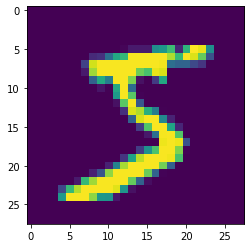

In [28]:
plt.imshow(np.asarray(x.loc[0,:]).reshape(-1,28))

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components = 0.99)

In [18]:
x_reduced = pca.fit_transform(x)

In [19]:
pca.n_components_

331

In [22]:
np.sum(pca.explained_variance_ratio_)

0.9900550292572762

In [24]:
len(pca.explained_variance_ratio_)

331

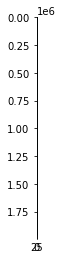

In [29]:
x_decompressed = pca.inverse_transform(x_reduced)

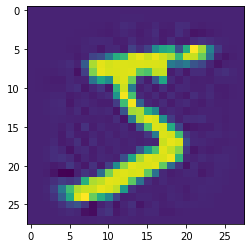

In [30]:
plt.imshow(x_decompressed[0].reshape(-1,28))

In [33]:
from xgboost import XGBClassifier

In [34]:
xgb_clf = XGBClassifier()

In [35]:
xgb_clf.fit(x_reduced,y)

/usr/lib/python3.9/site-packages/xgboost/sklearn.py:1194: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:14] WARNING: /var/tmp/pamac-build-athharv/xgboost-git/src/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)